In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1) Make an array of the first 12 even numbers with shape (2, 6). Print the resulting array following each step below. Use np.arange to make the sequence...

* Make every other value of the second row odd by subtracting 1 from it.
* Reverse the entries (columns) in the first row.
* Make the last value of the entire array the sum of all the other numbers beside the last value.
* Normalize the first row to have unit area (area of 1) by dividing by the sum of the first row and then overwriting the original contents of the first row with the normalized values. 
    * Did it work? or did you get a row of 0's after you normalized?
    * If you got a row of zeros, how would you change your original input parameters to np.arange to make it work? think about data types...

In [34]:
N = 12     # make a variable for how many even numbers you want so the routine is more flixible. 

even = np.arange(0.0, N * 2, 2).reshape(2, int(N/2)) + 2  # + 2 because 0 isn't even...
print(even.dtype)

# the way that works...need to make it a floating point array!
# even = np.arange(0, N * 2, 2, dtype='float64').reshape(2, int(N/2)) + 2  # + 2 because 0 isn't even...
# print(even.dtype)

# then make every other entry in the 2nd row odd...
even[1, ::2] -= 1
print(even)

# reverse the first row
even[0, :] = even[0, ::-1]
print(even)

# # make last value of the entire array the sum of all the other numbers excluding the last number
even[-1, -1] = np.sum(even) - even[-1, -1]
print(even)

# normalize each column of the array so that they sum to 1
even[0,:] = even[0,:] / np.sum(even[0,:],axis=0)
print(even)

float64
[[ 2.  4.  6.  8. 10. 12.]
 [13. 16. 17. 20. 21. 24.]]
[[12. 10.  8.  6.  4.  2.]
 [13. 16. 17. 20. 21. 24.]]
[[ 12.  10.   8.   6.   4.   2.]
 [ 13.  16.  17.  20.  21. 129.]]
[[2.85714286e-01 2.38095238e-01 1.90476190e-01 1.42857143e-01
  9.52380952e-02 4.76190476e-02]
 [1.30000000e+01 1.60000000e+01 1.70000000e+01 2.00000000e+01
  2.10000000e+01 1.29000000e+02]]


 ### 2) Create a two-dimensional array called *pts* (common abbreviation of **points**), where the first columns contains 100 values of x linearly spaced from -5 to 5 and the second column contains the values for y = 0.5x - 1.
 
 * Print the shape of *pts* to ensure you have created the array correctly.
     * Hint: first make x using linspace
     * Then make y using the given equation
     * Then google 'numpy column_stack' to concatenate x and y and assign to pnts
     * Last check to make sure that pnts is a 100 x 2 matrix (100 rows and 2 columns) 
 * Introduce uniformly distribution noise from (-1, 3) into the y values of the *pts*.
 * Ensure that the noise you introduced was distributed as you intended by plotting a histogram of the values you used for the noise (it should look roughly uniform). Search "matplotlib hist" to figure out how to make a histogram plot. 
 * Create a scatter plot using the first and second columns of the *pts* array as x and y, respectively. 
 * Now plot the line y = 0.5x - 1 on top of the scatter plot. 
 * Even though the line you plotted uses the same equation as the data you generated in pts, it does not appear to be the best fit to the points. Why is this? 

(100,)
(100, 2)


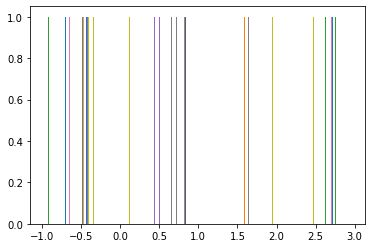

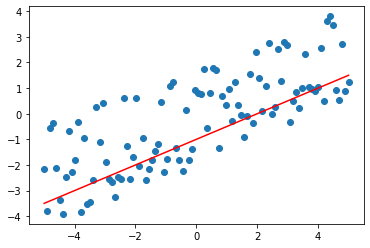

In [41]:
N = 100

x = np.linspace(-5, 5, N)
y = 0.5 * x - 1
print(y.shape)
pts = np.column_stack((x, y))
print(pts.shape)
# a = 3
# b = -1
# noise = (b-a) * np.random.rand(N) + a


noise = 4 * np.random.rand(N) - 1
plt.hist(noise)
plt.show()

# add in the noise...
pts[:, 1] = pts[:, 1] + noise

# scatter plot the data points
plt.scatter(pts[:,0], pts[:,1])
# then draw the line...
plt.plot(x, y, 'r')
plt.show()

In [42]:
noise.shape

(1, 100)

### 3) Make an array using linspace that goes from 0 to 360 in 180 steps. 
* Find all numbers in the array that are greater than 20
* Find all numbers in the array that less than 160 and greater than 45
* Find all numbers greater than 20 and less than 40 and assign to variable x. Then find all numbers that are greater than 60 and less than 81 and assign to variable y. 
    * Use an if...else statement and a boolean test to see if x and y are the same length. If they are, then multiply each element of x with the corresponding element in y. Do this first with a loop and then using the numpy equivalent. If x and y are not the same length then crop the longer of the two so that they are and then do the element by element multipication using a for loop. 
    * ***Make your implementation able to handle all cases of changing the range of values assigned to x and y (i.e. it will handle when x is longer than y and when y is longer than x)***
    * Next repeat the last step with the if...then logic but replace your element-by-element loop with the numpy equivalent (get rid of the loop).
* **Worth 5,000 bonus points**: which method, for loop vs numpy way, is faster? Google "cell magic timeit". Hint: when using the cell magic timeit, you'll need to do all variable assignments in the cell that you're timing (i.e. you'll need to assign x, y again in that cell)

In [ ]:
# array of numbers...
z = np.linspace(0,360,180)

# part 1
x = z[(z>20)]
# print(x)

# part 2
x = z[(z<160)&(z>45)]
# print(x)

# part 3
x = z[((z>20) & (z<40))]
y = z[(z>60) & (z<81)]

# way one, with for loops
if len(x)==len(y):
    out = np.full(len(x), np.nan)
    for cnt in np.arange(len(x)):
        out[cnt] = x[cnt]*y[cnt]
else:
    # crop the longer...
    if len(x)>len(y):
        x = x[:len(y)]
    elif len(y)>len(x):
        y = y[:len(x)]

    # then loop 
    out = np.full(len(x), np.nan)
    for cnt in np.arange(len(x)):
        out[cnt] = x[cnt]*y[cnt]    
        
        
# way two, without for loops
if len(x)==len(y):
    out = np.multiply(x,y)
else:
    # crop the longer...
    if len(x)>len(y):
        x = x[:len(y)]
    elif len(y)>len(x):
        y = y[:len(x)]

    # then multiply 
    out = np.multiply(x,y)

In [ ]:
%%timeit

z = np.linspace(0,360,180)
# part 3
x = z[(z>20) & (z<40)]
y = z[(z>80) & (z<101)]

# way one, with for loops
if len(x)==len(y):
    out = np.full(len(x), np.nan)
    for cnt in np.arange(len(x)):
        out[cnt] = x[cnt]*y[cnt]
else:
    # crop the longer...
    if len(x)>len(y):
        x = x[:len(y)]
    elif len(y)>len(x):
        y = y[:len(x)]

    # then loop 
    out = np.full(len(x), np.nan)
    for cnt in np.arange(len(x)):
        out[cnt] = x[cnt]*y[cnt] 

In [ ]:
%%timeit
z = np.linspace(0,360,180)
# part 3
x = z[(z>20) & (z<40)]
y = z[(z>80) & (z<101)]

# way two, without for loops
if len(x)==len(y):
    out = np.multiply(x,y)
else:
    # crop the longer...
    if len(x)>len(y):
        x = x[:len(y)]
    elif len(y)>len(x):
        y = y[:len(x)]

    # then loop 
    out = np.multiply(x,y)